<a href="https://colab.research.google.com/github/onticonti/Web_scraping_and_ML/blob/master/Modacruz_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
    
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
    
import pandas as pd, numpy as np
    
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches


In [ ]:
#@title Run on TensorFlow 2.x
%tensorflow_version 2.x
from __future__ import absolute_import, division, print_function, unicode_literals

In [ ]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

In [ ]:
!pip install autoplotter
import pandas as pd
from autoplotter import run_app
import plotly.express as px
ydf = pd.read_csv("modacruz.csv")
df = ydf.copy()
run_app(df)

     |████████████████████████████████| 112kB 3.6MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.8MB 20.1MB/s 
     |████████████████████████████████| 194kB 39.4MB/s 
     |████████████████████████████████| 71kB 8.2MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 3.4MB 41.0MB/s 
     |████████████████████████████████| 1.2MB 41.1MB/s 
     |████████████████████████████████| 358kB 42.7MB/s 
  Created wheel for dash-bootstrap-components: filename=dash_bootstrap_components-0.10.5-cp36-none-any.whl size=180066 sha256=f74de81cfefe63423a452c42f871b84888c10d5c55f0af90977b8c9915efbf77
  Stored in directory: /root/.cache/pip/wheels/41/7a/35/3c7ab615003bb9dbfcced330982b5a42f0d3a4c02e317b46ac
Successfully built dash-bootstrap-components
  Created wheel for dash-table: filename=dash_table-4.9.0-cp36-none-any.whl size=1780769

ModuleNotFoundError: ignored

In [ ]:
import pandas as pd

ydf = pd.read_csv('modacruz.csv')
df = ydf.copy()

print("Bu veri setinde {} adet observations ve {} adet feature var. \n".format(df.shape[0],df.shape[1]))

print("Bu veri setindeki {} adet benzersiz markalar veri tipi bulunur.  İlk 5 tanesi :  {}... \n".format(len(df.markalar.unique()),                                                                                                
                                                                           ", ".join(df.markalar.unique()[0:5])))

print("Bu veri setindeki {} adet benzersiz bedenler veri tipi bulunur. İlk 5 tanesi :  {}... \n".format(len(df.bedenler.unique()),                                                                                                
                                                                           " ".join(str(df.bedenler.unique()[0:5]))))
                                                                                      

In [ ]:
df.head()

,kullanicilar,markalar,fiyatlar,bedenler,kategori,begeniler,yorumlar
0,nagi1989,Rosa Clara,35 TL,S / 36,Bluz,NaN,NaN
1,ModaFelya,Butik Ürünü,44 TL,M / 38,Tişört,1.0,NaN
2,sibelegemen,YKM,20 TL,M / 38,Bluz,5.0,NaN
3,melikebusra,adL – Adil Işık,40 TL,S / 36,Bluz,NaN,NaN
4,gulumsesu,H&M,90 TL,M / 38,Bluz,3.0,NaN


In [ ]:
df.columns

Index(['kullanicilar', 'markalar', 'fiyatlar', 'bedenler', 'kategori',
       'begeniler', 'yorumlar'],
      dtype='object')

In [ ]:
df.dtypes

kullanicilar     object
markalar         object
fiyatlar         object
bedenler         object
kategori         object
begeniler       float64
yorumlar        float64
dtype: object

In [ ]:
df.count()

kullanicilar    7933
markalar        7933
fiyatlar        7933
bedenler        7933
kategori        7933
begeniler       3468
yorumlar         178
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7933 entries, 0 to 7932
Data columns (total 7 columns):
kullanicilar    7933 non-null object
markalar        7933 non-null object
fiyatlar        7933 non-null object
bedenler        7933 non-null object
kategori        7933 non-null object
begeniler       3468 non-null float64
yorumlar        178 non-null float64
dtypes: float64(2), object(5)
memory usage: 433.9+ KB


In [ ]:
#Fiyatlar columndaki Tl' yi kaldırma
df['fiyatlar'] = df['fiyatlar'].str.strip('TL')
#df['fiyatlar'] = df['fiyatlar'].str.replace('TL', '')

In [ ]:
df['fiyatlar'] = pd.to_numeric(df['fiyatlar'],errors='coerce')

In [ ]:
df['kategori'] = df['kategori'].astype('category')
df['markalar'] = df['markalar'].astype('category')
df['bedenler'] = df['bedenler'].astype('category')

In [ ]:
df.dtypes

kullanicilar      object
markalar        category
fiyatlar         float64
bedenler        category
kategori        category
begeniler        float64
yorumlar         float64
dtype: object

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fiyatlar,7925.0,54.550662,57.637887,5.0,21.0,39.0,65.0,850.0
begeniler,3468.0,1.824683,2.059919,1.0,1.0,1.0,2.0,54.0
yorumlar,178.0,1.803371,1.825924,1.0,1.0,1.0,2.0,16.0


In [ ]:
df.groupby('kategori').size()

kategori
Askılı             232
Bluz              1881
Büstiyer           347
Eşofman Üstü        72
Fitness Atleti      53
Gömlek            3616
Hırka               45
Kazak/Triko        171
Kimono              23
Kokteyl Parti        1
Spor Sütyeni        66
Sweatshirt          83
Tişört            1202
Tunik              128
Yelek               13
dtype: int64

In [ ]:
df.groupby('bedenler').size()

bedenler
33              1
3XL / 46       48
4XL / 48       21
5XL / 50       13
6XL / 52        2
7XL / 54        4
L               4
L / 40       1201
M               5
M / 38       2445
S               2
S / 36       2841
Tek Beden       1
XL / 42       449
XS / 34       698
XXL / 44      135
XXS / 32       63
dtype: int64

In [ ]:
df.groupby('kategori').describe().T

kategori             Askılı         Bluz    Büstiyer  Eşofman Üstü  \
fiyatlar  count  232.000000  1881.000000  347.000000     72.000000   
          mean    38.629310    57.862839   65.037464    103.486111   
          std     31.480505    53.663741   69.491350    106.533998   
          min      5.000000     5.000000    5.000000     15.000000   
          25%     20.000000    25.000000   29.000000     45.000000   
          50%     30.000000    40.000000   45.000000     77.500000   
          75%     45.000000    70.000000   80.000000    106.250000   
          max    225.000000   750.000000  690.000000    750.000000   
begeniler count  119.000000  1027.000000  224.000000     34.000000   
          mean     1.823529     1.969815    2.321429      2.558824   
          std      2.246078     2.057190    2.448443      3.086541   
          min      1.000000     1.000000    1.000000      1.000000   
          25%      1.000000     1.000000    1.000000      1.000000   
          50%      1.000000     1.000000    2.000000      1.000000   
          75%      2.000000     2.000000    3.000000      2.750000   
          max     18.000000    38.000000   26.000000     15.000000   
yorumlar  count    8.000000    38.000000   12.000000      5.000000   
          mean     1.625000     1.710526    1.166667      3.000000   
          std      0.517549     0.956002    0.389249      3.391165   
          min      1.000000     1.000000    1.000000      1.000000   
          25%      1.000000     1.000000    1.000000      1.000000   
          50%      2.000000     1.000000    1.000000      2.000000   
          75%      2.000000     2.000000    1.000000      2.000000   
          max      2.000000     5.000000    2.000000      9.000000   

kategori         Fitness Atleti       Gömlek       Hırka  Kazak/Triko  \
fiyatlar  count       53.000000  3613.000000   45.000000   171.000000   
          mean        70.301887    47.010241   73.244444    65.707602   
          std         55.737222    52.306667   59.595285    56.326328   
          min          7.000000     5.000000    8.000000    10.000000   
          25%         30.000000    20.000000   35.000000    25.000000   
          50%         50.000000    30.000000   50.000000    50.000000   
          75%        100.000000    55.000000   90.000000    85.000000   
          max        260.000000   850.000000  280.000000   250.000000   
begeniler count       27.000000  1222.000000   19.000000    75.000000   
          mean         1.888889     1.590835    2.000000     1.453333   
          std          1.476309     1.579822    1.732051     1.535995   
          min          1.000000     1.000000    1.000000     1.000000   
          25%          1.000000     1.000000    1.000000     1.000000   
          50%          1.000000     1.000000    1.000000     1.000000   
          75%          2.000000     2.000000    2.000000     1.000000   
          max          7.000000    23.000000    8.000000    13.000000   
yorumlar  count        3.000000    63.000000    1.000000     3.000000   
          mean         2.333333     2.031746    1.000000     2.000000   
          std          0.577350     2.306850         NaN     1.732051   
          min          2.000000     1.000000    1.000000     1.000000   
          25%          2.000000     1.000000    1.000000     1.000000   
          50%          2.000000     1.000000    1.000000     1.000000   
          75%          2.500000     2.000000    1.000000     2.500000   
          max          3.000000    16.000000    1.000000     4.000000   

kategori             Kimono  Kokteyl Parti  Spor Sütyeni  Sweatshirt  \
fiyatlar  count   23.000000            1.0     66.000000   83.000000   
          mean   105.826087          279.0     74.575758  103.903614   
          std     67.578004            NaN     54.606300  117.701526   
          min     25.000000          279.0     15.000000    5.000000   
          25%     75.000000          279.0     35.000000   35.0

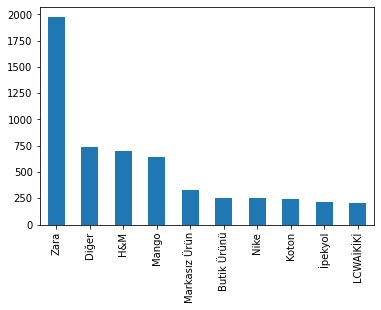

In [ ]:
df.markalar.value_counts().nlargest(10).plot(kind="bar")

In [ ]:
gb = df.groupby(['markalar', 'bedenler'])
gb.apply(lambda _df: _df.sort_values(by=['fiyatlar']))

kullanicilar          markalar  \
markalar         bedenler                                                  
1000 Hour        5XL / 50  7006         eminehirahasan         1000 Hour   
                           7007         eminehirahasan         1000 Hour   
                 7XL / 54  7173          Gulsahaydogdu         1000 Hour   
                 L / 40    3706         gizemlidolap06         1000 Hour   
                           15           balsuratlinizz         1000 Hour   
                           6961               sevgim85         1000 Hour   
                           7178          Gulsahaydogdu         1000 Hour   
                           200               bebek4141         1000 Hour   
                 M / 38    3876          elanindolabii         1000 Hour   
                           1566               gulcekic         1000 Hour   
                           10                   duduhd         1000 Hour   
                           2191                 fehand         1000 Hour   
                 S / 36    4858               Resbusra         1000 Hour   
                           3870          elanindolabii         1000 Hour   
                           5093               edayzglr         1000 Hour   
                           1206                 aliss1         1000 Hour   
                           7287          canyagmur1453         1000 Hour   
                 XL / 42   5136          gunduzekmekci         1000 Hour   
                 XXL / 44  3421              hilal3636         1000 Hour   
17 Sundays       L / 40    5179           cruzerxrxrxr        17 Sundays   
1v1y             L / 40    7768  benimdolabimdakiler12              1v1y   
                 M / 38    6229           arya0110arya              1v1y   
                 S / 36    1152           cruzer607634              1v1y   
                 XXL / 44  6683             nevin63359              1v1y   
                 XXS / 32  102            arya0110arya              1v1y   
2 Star           M / 38    1618           cruzer607634            2 Star   
2B               S / 36    1150           cruzer607634                2B   
2Chillies        S / 36    5171               Basakemk         2Chillies   
34 VK Design     L / 40    3905             asliyagiz2      34 VK Design   
A. Lange & Söhne S / 36    115               humaleyna  A. Lange & Söhne   
...                                                ...               ...   
İpekyol          S / 36    7092                 Estyle           İpekyol   
                           5434                 yanya8           İpekyol   
                           5240                  JZZMN           İpekyol   
                           5239                  JZZMN           İpekyol   
                 Tek Beden 5746               ezohanim           İpekyol   
                 XL / 42   1601                AYNBATU           İpekyol   
                           561                gul33gul           İpekyol   
                           6390                 pamiro           İpekyol   
                           826                ferideez           İpekyol   
                           1757                mrvckr1           İpekyol   
                           6673                nazzrsy           İpekyol   
                           7563          kokosundolabi           İpekyol   
                           681                Safariko           İpekyol   
                           754                cemretok           İpekyol   
                           6800             greatsaler           İpekyol   
                           1337                mzsynkz           İpekyol   
                           6722             Zeyzey1207           İpekyol   
                           391               unluuyumu           İpekyol   
                           354               unluuyumu           İpekyol   
                           5583                 ozname           İpekyol   
              

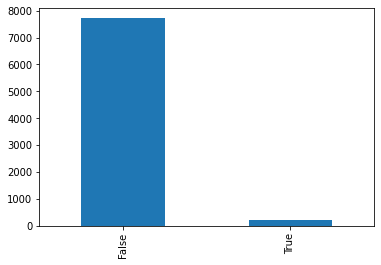

In [ ]:
ipekyol = df.markalar.str.contains("İpekyol")
pd.DataFrame(ipekyol)
ipekyol.value_counts().plot(kind="bar")
plt.show()


In [ ]:
ipekyol.value_counts()

False    7714
True      219
Name: markalar, dtype: int64

In [ ]:
pd.crosstab(df.markalar,df.fiyatlar)


fiyatlar,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,...,470.0,500.0,550.0,600.0,620.0,690.0,700.0,749.0,750.0,850.0
markalar,,,,,,,,,,,,,,,,,,,,,
1000 Hour,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17 Sundays,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1v1y,0,0,1,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2 Star,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2B,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2Chillies,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34 VK Design,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A. Lange & Söhne,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ADAMO,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
pd.crosstab(df.kategori,df.fiyatlar)

fiyatlar,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,...,470.0,500.0,550.0,600.0,620.0,690.0,700.0,749.0,750.0,850.0
kategori,,,,,,,,,,,,,,,,,,,,,
Askılı,6,0,1,1,1,8,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Bluz,19,1,4,3,2,57,0,4,3,4,...,0,2,0,0,0,0,0,0,1,0
Büstiyer,2,0,0,0,0,4,0,2,0,0,...,0,0,0,0,0,2,0,0,0,0
Eşofman Üstü,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Fitness Atleti,0,0,1,0,0,3,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Gömlek,42,3,6,27,3,211,6,25,26,6,...,1,4,0,0,1,0,0,1,1,1
Hırka,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kazak/Triko,0,0,0,0,0,11,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kimono,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
ucuz_gomlek = df[(df['kategori'] == "Gömlek") & (df['fiyatlar'] == 5)]
ucuz_gomlek

,kullanicilar,markalar,fiyatlar,bedenler,kategori,begeniler,yorumlar
1119,Pembepanter92,Butik Ürünü,5.0,S / 36,Gömlek,NaN,NaN
1150,cruzer607634,2B,5.0,S / 36,Gömlek,NaN,NaN
1916,kuzeymiray,Markasız Ürün,5.0,M / 38,Gömlek,NaN,NaN
1988,ecederin12,Defacto,5.0,S / 36,Gömlek,1.0,NaN
2130,cruzer740729,Butik Ürünü,5.0,S / 36,Gömlek,1.0,NaN
2262,paprika00,Trendyol,5.0,S / 36,Gömlek,2.0,NaN
2330,cruzer890770,Diğer,5.0,S / 36,Gömlek,1.0,NaN
2402,GulMelissa,Miss Poem,5.0,S / 36,Gömlek,2.0,5.0
2450,sinkonundolabi1,Markasız Ürün,5.0,L / 40,Gömlek,NaN,NaN
2514,90laringozdesi,Butik Ürünü,5.0,XL / 42,Gömlek,1.0,NaN


In [ ]:
y_gomlek = df[(df['kategori'] == "Gömlek") & (df['fiyatlar'] < 10) & (df['bedenler'] == "XXL / 44")]
y_gomlek

,kullanicilar,markalar,fiyatlar,bedenler,kategori,begeniler,yorumlar
3547,gnygnr,Markasız Ürün,5.0,XXL / 44,Gömlek,NaN,NaN
3820,rubicantef,XSide,7.0,XXL / 44,Gömlek,NaN,NaN
6438,P4C,Markasız Ürün,5.0,XXL / 44,Gömlek,NaN,NaN


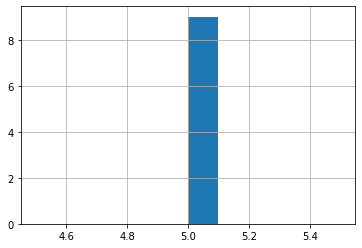

In [ ]:
df[df["kullanicilar"]=="Ucuzgiyim67"]["fiyatlar"].hist()

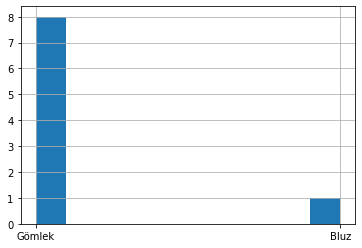

In [ ]:
df[df["kullanicilar"]=="Ucuzgiyim67"]["kategori"].hist()

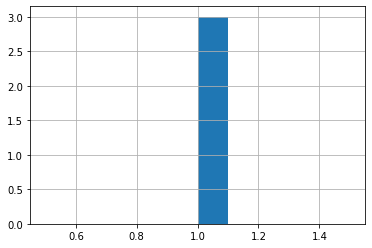

In [ ]:
df[df["kullanicilar"]=="Ucuzgiyim67"]["begeniler"].hist()

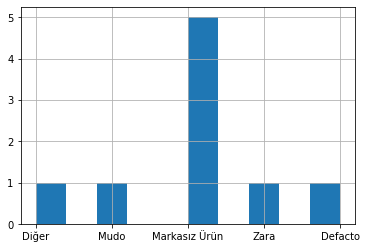

In [ ]:
df[df["kullanicilar"]=="Ucuzgiyim67"]["markalar"].hist()

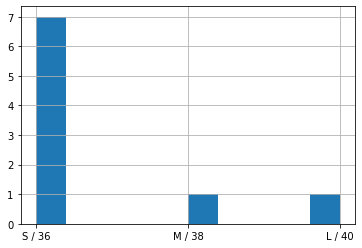

In [ ]:
df[df["kullanicilar"]=="Ucuzgiyim67"]["bedenler"].hist()

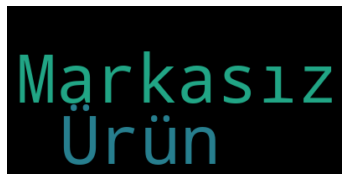

In [ ]:

text = df.markalar[300]
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


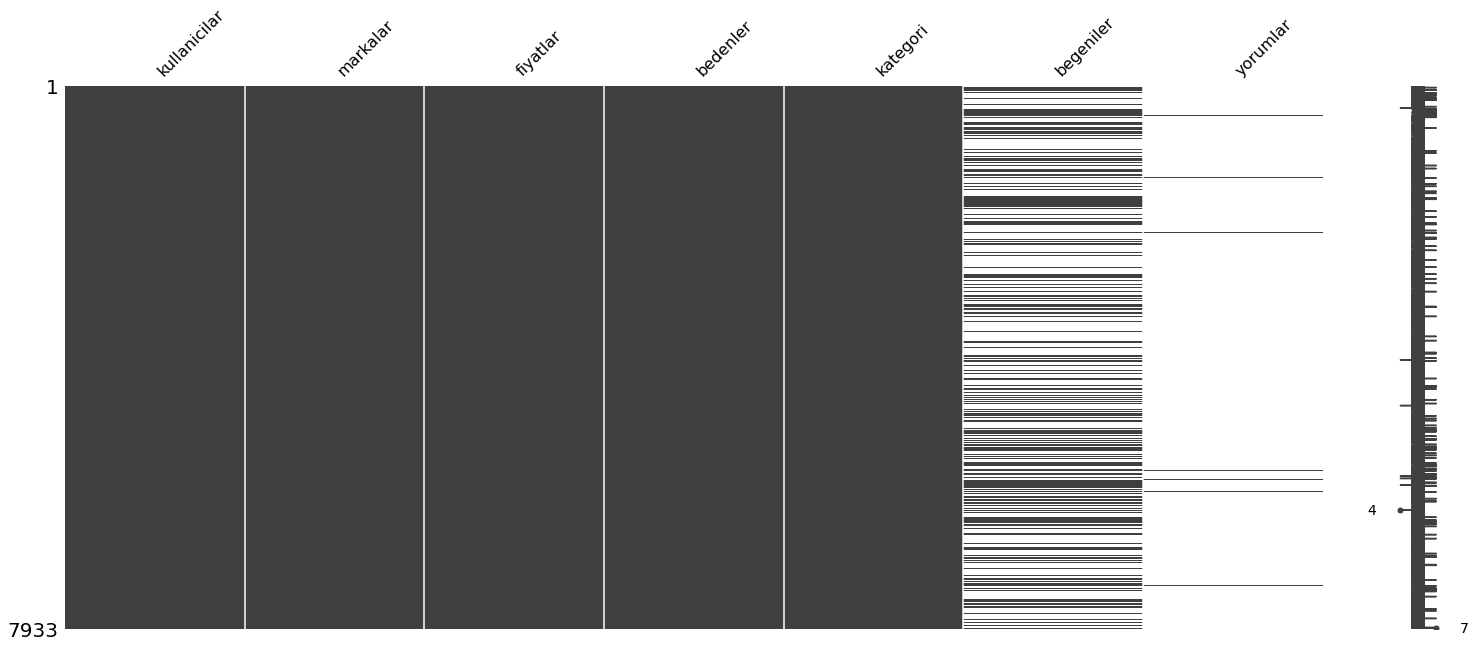

In [ ]:
import missingno as msno 
import matplotlib.pyplot as plt 

msno.matrix(df)  
plt.show() 

,Boş veri sayısı,Oran (%)
kullanicilar,0,0.000000
markalar,0,0.000000
fiyatlar,8,0.100845
bedenler,0,0.000000
kategori,0,0.000000
begeniler,4465,56.283877
yorumlar,7755,97.756208


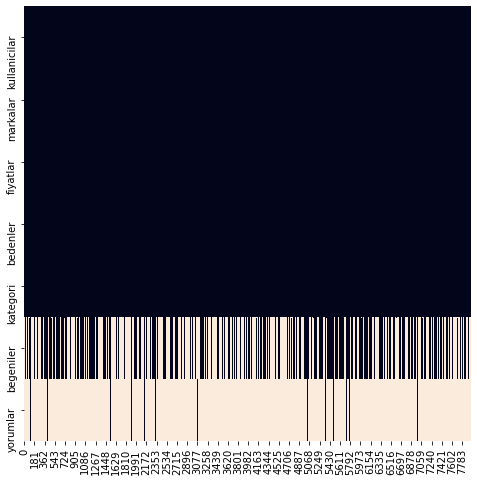

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,8))
sns.heatmap(pd.isnull(df.T), cbar=False)

pd.concat([df.isnull().sum(), 100 * df.isnull().sum()/len(df)], 
              axis=1).rename(columns={0:'Boş veri sayısı', 1:'Oran (%)'})

In [ ]:
# For facets

from IPython.core.display import display, HTML
import base64
!pip install facets-overview==1.0.0
from facets_overview.feature_statistics_generator import FeatureStatisticsGenerator

#@title Visualize the Data in Facets
fsg = FeatureStatisticsGenerator()
dataframes = [
    {'table': df, 'name': 'Data'}]
censusProto = fsg.ProtoFromDataFrames(dataframes)
protostr = base64.b64encode(censusProto.SerializeToString()).decode("utf-8")


HTML_TEMPLATE = """<script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
        <facets-overview id="elem"></facets-overview>
        <script>
          document.querySelector("#elem").protoInput = "{protostr}";
        </script>"""
html = HTML_TEMPLATE.format(protostr=protostr)
display(HTML(html))

AttributeError: 'CategoricalDtype' object has no attribute 'char'

In [ ]:
#df = df.drop(["fiyat_grup","kullanicilar"], axis=1)

In [ ]:
group_names = ['1-3', '3-5', '5-7','7-9','9-10'] 
df['fiyat_grup'] = pd.qcut(df['fiyatlar'], q = 5,labels=group_names)
df

,kullanicilar,markalar,fiyatlar,bedenler,kategori,begeniler,yorumlar,fiyat_grup
0,nagi1989,Rosa Clara,35.0,S / 36,Bluz,NaN,NaN,5-7
1,ModaFelya,Butik Ürünü,44.0,M / 38,Tişört,1.0,NaN,5-7
2,sibelegemen,YKM,20.0,M / 38,Bluz,5.0,NaN,1-3
3,melikebusra,adL – Adil Işık,40.0,S / 36,Bluz,NaN,NaN,5-7
4,gulumsesu,H&M,90.0,M / 38,Bluz,3.0,NaN,9-10
5,zeyneppozdemirr,Zara,45.0,S / 36,Gömlek,8.0,NaN,5-7
6,beyveys,İpekyol,160.0,L / 40,Gömlek,1.0,NaN,9-10
7,ayak1234,Trendyol,30.0,L / 40,Gömlek,1.0,NaN,3-5
8,mmerveuysall,Twist,50.0,M / 38,Bluz,4.0,NaN,7-9
9,cruzer893678,Tommy Hilfiger,70.0,M / 38,Sweatshirt,4.0,NaN,7-9


In [ ]:
df.fiyat_grup.value_counts()

1-3     1980
7-9     1650
9-10    1491
5-7     1480
3-5     1324
Name: fiyat_grup, dtype: int64

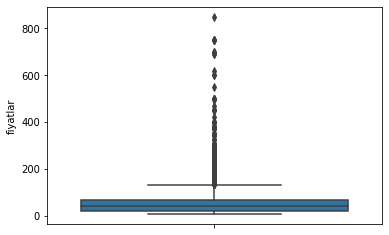

In [ ]:
import seaborn as sns

sns.boxplot(y="fiyatlar",data=df)

Mavi kutunun ortasindaki çizgi %50 lik dilimi yani medianı gösterir.
Kutunun üst çizgisi %75 yüzdelik dilimi
Kutunun alt çizgi de %25 yüzdelik dilimi gösteir
Bu kutunun yüksekliği verilerin %50sini içerir.
Çeyrekler arası aralık (interquantile range - IQR) olarak isimlendirilir
Kutunun üstünde ve altındaki çizgilere bıyık denir
Üst bıyığın ucu kutunun üst çizgisinden 1.5 x IQR uzaklıktadır.
Alt bıyığın ucu kutunun alt çizgisinden 1.5 x IQR uzaklıktadır.
Bıyıkların uçlarından daha ileride olan veri noktaları aykırı değer olarak degerlendirilir.

In [ ]:
iqr = df['fiyatlar'].describe()['75%'] - df['fiyatlar'].describe()['25%']
lower_bound = df['fiyatlar'].describe()['25%'] - (1.5*iqr)
upper_bound = df['fiyatlar'].describe()['75%'] + (1.5*iqr)
print("IQR equals {}".format(iqr))
print("Lower bound of price is {}".format(lower_bound))
print("Upper bound of price is {}".format(upper_bound))

IQR equals 44.0
Lower bound of price is -45.0
Upper bound of price is 131.0


In [ ]:
data_clean = df.copy()
data_clean = df[(df.fiyatlar > 0) & (df.fiyatlar <= upper_bound)]
data_clean.shape

(7370, 8)

In [ ]:
df.shape

(7933, 8)

In [ ]:
#! Kovaryans 2 değişkenin beraber haraket etme derecesini ölçen bir istatistiktir.
#x ve y değişkenleri beraber hareket ediyorsa biri artarken diğeri de artıyorsa diğeri azalırken diğeri azzalıyorsa pozitif korelasyonlu
kov = np.cov(df.begeniler,df.fiyatlar)

#'np.cov()' fonksiyonu bize sonuç olarak bir kovaryans matrisini verir.Bu matristen kovaryans rakamı çıkarmak için
#1.satır 2.sütündaki ya da simetriğindeki 2.satir 1.sütündakı rakamı çıkarmamız gerekir
#kov[1,0]  ya da kov [0,1]
#Kovaryans bize ilişkinin yönü hakkında bilgi verir (pozitif veya negatif)
kov[1,0]

nan

In [ ]:
#İlişkinin gücü hakkında bilgisi Pearson korelasyon katsıyısı verir.
#Pearson korelasyon katsayısı -1 ve +1 aralığı -1 mükkemel negatif korelasyon +1 mukkemel pozitif 0 korelasyon yok
#kor = np.corrcoef(df.begeniler,df.fiyatlar)
#kor[1,0] ya da kor[0,1]  korelasyon rakamı seçilir
#*Scatter plot ile cizebiliriz
#sns.scatterplot("begeniler","fiyatlar",data=df)
#plt.xlabel("Begeni Sayısı") plt.ylabel("fiyat")

In [ ]:
#Rastgele gozlem secımı
df1 = df[df["markalar"]== "Zara"] 
df_s1 = df1.sample(n=50,random_state=1)
df_s1["fiyatlar"].mean()   


50.36

In [ ]:
df1.mean()

fiyatlar     55.940132
begeniler     1.841802
yorumlar      1.414634
dtype: float64

In [ ]:
#Bootstrap 
#istatiksel çıkarım yapmak amacıyla olarak populasyondan n sayıda örneklem çıkarmak anlamında kullanbılırız
#np.random.choice()
boot = np.random.choice(df["fiyatlar"],size=100)
boot = pd.DataFrame(boot)
boot.describe().T

,count,mean,std,min,25%,50%,75%,max
0,100.0,51.94,47.424756,10.0,25.0,35.0,65.0,350.0


In [ ]:
data_clean["yorumlar"] =  data_clean["yorumlar"].fillna(0)
data_clean["begeniler"]  = data_clean["begeniler"].fillna(0)
data_clean["fiyatlar"]  = data_clean["fiyatlar"].fillna(data_clean.fiyatlar.mean())
data_clean

C:\Users\Onur\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Onur\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Onur\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

,kullanicilar,markalar,fiyatlar,bedenler,kategori,begeniler,yorumlar,fiyat_grup
0,nagi1989,Rosa Clara,35.0,S / 36,Bluz,0.0,0.0,5-7
1,ModaFelya,Butik Ürünü,44.0,M / 38,Tişört,1.0,0.0,5-7
2,sibelegemen,YKM,20.0,M / 38,Bluz,5.0,0.0,1-3
3,melikebusra,adL – Adil Işık,40.0,S / 36,Bluz,0.0,0.0,5-7
4,gulumsesu,H&M,90.0,M / 38,Bluz,3.0,0.0,9-10
5,zeyneppozdemirr,Zara,45.0,S / 36,Gömlek,8.0,0.0,5-7
7,ayak1234,Trendyol,30.0,L / 40,Gömlek,1.0,0.0,3-5
8,mmerveuysall,Twist,50.0,M / 38,Bluz,4.0,0.0,7-9
9,cruzer893678,Tommy Hilfiger,70.0,M / 38,Sweatshirt,4.0,0.0,7-9
10,duduhd,1000 Hour,26.0,M / 38,Bluz,0.0,0.0,3-5


In [ ]:
data_clean.isnull().sum()

kullanicilar    0
markalar        0
fiyatlar        0
bedenler        0
kategori        0
begeniler       0
yorumlar        0
fiyat_grup      0
dtype: int64

In [ ]:
data_clean = data_clean.drop("kullanicilar",axis=1)
data_clean = data_clean.drop("fiyat_grup",axis=1)
data_clean

,markalar,fiyatlar,bedenler,kategori,begeniler,yorumlar
0,Rosa Clara,35.0,S / 36,Bluz,0.0,0.0
1,Butik Ürünü,44.0,M / 38,Tişört,1.0,0.0
2,YKM,20.0,M / 38,Bluz,5.0,0.0
3,adL – Adil Işık,40.0,S / 36,Bluz,0.0,0.0
4,H&M,90.0,M / 38,Bluz,3.0,0.0
5,Zara,45.0,S / 36,Gömlek,8.0,0.0
7,Trendyol,30.0,L / 40,Gömlek,1.0,0.0
8,Twist,50.0,M / 38,Bluz,4.0,0.0
9,Tommy Hilfiger,70.0,M / 38,Sweatshirt,4.0,0.0
10,1000 Hour,26.0,M / 38,Bluz,0.0,0.0


In [ ]:
categoricalColumns = ['markalar','bedenler','kategori']
print("Categorical columns : ")
print(categoricalColumns)

Categorical columns : 
['markalar', 'bedenler', 'kategori']


In [ ]:
impute_categorical = SimpleImputer(strategy="most_frequent")
onehot_categorical = OneHotEncoder(handle_unknown='ignore')
categorical_transformer = Pipeline(steps=[('impute',impute_categorical),('onehot',onehot_categorical)])

In [ ]:
numericalColumns = df.select_dtypes(include=[np.float,np.int]).columns
print("Numerical columns : " )
print(numericalColumns)


Numerical columns : 
Index(['fiyatlar', 'begeniler', 'yorumlar'], dtype='object')


In [ ]:
scaler_numerical = StandardScaler()
numerical_transformer = Pipeline(steps=[('scale',scaler_numerical)])

In [ ]:
preprocessorForCategoricalColumns = ColumnTransformer(transformers=[('cat',categorical_transformer,categoricalColumns)])
preprocessorForAllColumns = ColumnTransformer(transformers=[('cat',categorical_transformer,categoricalColumns),
                                                            ('num',numerical_transformer,numericalColumns)])

In [ ]:
data_clean_temp = preprocessorForCategoricalColumns.fit_transform(data_clean)
print("Data after transforming : ")
print(data_clean_temp)

Data after transforming : 
  (0, 228)	1.0
  (0, 311)	1.0
  (0, 318)	1.0
  (1, 49)	1.0
  (1, 309)	1.0
  (1, 328)	1.0
  (2, 286)	1.0
  (2, 309)	1.0
  (2, 318)	1.0
  (3, 294)	1.0
  (3, 311)	1.0
  (3, 318)	1.0
  (4, 109)	1.0
  (4, 309)	1.0
  (4, 318)	1.0
  (5, 292)	1.0
  (5, 311)	1.0
  (5, 322)	1.0
  (6, 267)	1.0
  (6, 307)	1.0
  (6, 322)	1.0
  (7, 270)	1.0
  (7, 309)	1.0
  (7, 318)	1.0
  (8, 262)	1.0
  :	:
  (7361, 322)	1.0
  (7362, 109)	1.0
  (7362, 309)	1.0
  (7362, 318)	1.0
  (7363, 189)	1.0
  (7363, 309)	1.0
  (7363, 328)	1.0
  (7364, 292)	1.0
  (7364, 307)	1.0
  (7364, 318)	1.0
  (7365, 109)	1.0
  (7365, 309)	1.0
  (7365, 318)	1.0
  (7366, 82)	1.0
  (7366, 315)	1.0
  (7366, 322)	1.0
  (7367, 157)	1.0
  (7367, 309)	1.0
  (7367, 318)	1.0
  (7368, 292)	1.0
  (7368, 311)	1.0
  (7368, 322)	1.0
  (7369, 284)	1.0
  (7369, 315)	1.0
  (7369, 322)	1.0


In [ ]:
data_clean_temp_2 = preprocessorForAllColumns.fit_transform(data_clean)
print("Data after transforming :")
print(data_clean_temp_2)

Data after transforming :
  (0, 228)	1.0
  (0, 311)	1.0
  (0, 318)	1.0
  (0, 331)	-0.28035390305174307
  (0, 332)	-0.49715254858515034
  (0, 333)	-0.10924037199419992
  (1, 49)	1.0
  (1, 309)	1.0
  (1, 328)	1.0
  (1, 331)	0.04703825169160413
  (1, 332)	0.15457535662163693
  (1, 333)	-0.10924037199419992
  (2, 286)	1.0
  (2, 309)	1.0
  (2, 318)	1.0
  (2, 331)	-0.826007494290655
  (2, 332)	2.761486977448786
  (2, 333)	-0.10924037199419992
  (3, 294)	1.0
  (3, 311)	1.0
  (3, 318)	1.0
  (3, 331)	-0.0984693726387724
  (3, 332)	-0.49715254858515034
  (3, 333)	-0.10924037199419992
  (4, 109)	1.0
  :	:
  (7365, 333)	-0.10924037199419992
  (7366, 82)	1.0
  (7366, 315)	1.0
  (7366, 322)	1.0
  (7366, 331)	-0.28035390305174307
  (7366, 332)	0.8063032618284242
  (7366, 333)	-0.10924037199419992
  (7367, 157)	1.0
  (7367, 309)	1.0
  (7367, 318)	1.0
  (7367, 331)	0.2652996881871689
  (7367, 332)	-0.49715254858515034
  (7367, 333)	-0.10924037199419992
  (7368, 292)	1.0
  (7368, 311)	1.0
  (7368, 322)	

In [ ]:
features = []
features = data_clean.drop(['fiyatlar'],axis=1)

In [ ]:
label_churn = pd.DataFrame(data_clean, columns = ['fiyatlar'])
label_encoder = LabelEncoder()
label = data_clean['fiyatlar']

In [ ]:
label = label_encoder.fit_transform(label)
print("Encoded value of fiyatlar after applying label encoder : " + str(label))

Encoded value of fiyatlar after applying label encoder : [30 39 15 ... 45 70 25]


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data_clean["markalar"] = label_encoder.fit_transform(data_clean["markalar"])
data_clean["bedenler"] = label_encoder.fit_transform(data_clean["bedenler"])
data_clean["kategori"] = label_encoder.fit_transform(data_clean["kategori"])

In [ ]:
data_clean

,markalar,fiyatlar,bedenler,kategori,begeniler,yorumlar
0,228,35.0,11,1,0.0,0.0
1,49,44.0,9,11,1.0,0.0
2,286,20.0,9,1,5.0,0.0
3,294,40.0,11,1,0.0,0.0
4,109,90.0,9,1,3.0,0.0
5,292,45.0,11,5,8.0,0.0
7,267,30.0,7,5,1.0,0.0
8,270,50.0,9,1,4.0,0.0
9,262,70.0,9,10,4.0,0.0
10,0,26.0,9,1,0.0,0.0


In [ ]:
X = data_clean.drop("fiyatlar",axis=1)
y = data_clean["fiyatlar"]

In [ ]:
X_train,X_test , y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#print(scaler.mean_)
#print(scaler.scale_)

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
y_train_scaled = scaler.fit_transform(y_train)

In [ ]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
X_train_normalized = normalizer.fit_transform(X_train)
X_test_normalized = normalizer.fit_transform(X_test)

In [ ]:
import statsmodels.api as sm
model_sm = sm.OLS(X,y)
result = model_sm.fit()
print(result.summary)

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x0000023B632F6408>>


In [ ]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import RidgeCV,LassoCV,ElasticnetCV



ImportError: cannot import name 'ElasticnetCV' from 'sklearn.linear_model' (C:\Users\Onur\Anaconda3\lib\site-packages\sklearn\linear_model\__init__.py)

In [ ]:
from sklearn.linear_model import LinearRegression
X_lm = data_clean.drop('fiyatlar',axis=1)   
y_lm = data_clean["fiyatlar"]
lm = LinearRegression().fit(X_lm,y_lm)
print(lm.intercept_)  
print(lm.coef_)
y_pred = lm.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))


27.971929117399107
[ 0.05248931  0.29521515  0.18902223  2.0112596  -1.09994781]
27.682210655876503


In [ ]:
# Spot Check Algorithms
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score



In [ ]:
knn_model = KNeighborsRegressor().fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
hata_karaler = np.sqrt(mean_squared_error(y_test,y_pred))
ortalama_hata = mean_absolute_error(y_test,y_pred)
r2_hata = r2_score(y_test,y_pred)
model_score = knn_model.score(y_test,y_pred)
print("hata karaler  : {}" .format(hata_karaler))
print("ortalama hata :  {}" .format(ortalama_hata))
print("r2 score :  {}" .format(r2_hata))
print("model score :  {}" .format(model_score))

ValueError: Expected 2D array, got 1D array instead:
array=[ 65.  21. 100. ...  30.  30.  10.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
xgb_model = XGBRegressor().fit(X_train,y_train)
y_pred = xgb_model.predict(X_test)
hata_karaler = np.sqrt(mean_squared_error(y_test,y_pred))
ortalama_hata = mean_absolute_error(y_test,y_pred)
r2_hata = r2_score(y_test,y_pred)
print("hata karaler  : {}" .format(hata_karaler))
print("ortalama hata :  {}" .format(ortalama_hata))
print("r2 score :  {}" .format(r2_hata))

hata karaler  : 26.045467623579942
ortalama hata :  19.691422773326018
r2 score :  0.15428980275069482


In [ ]:
gbm_model = GradientBoostingRegressor().fit(X_train,y_train)
y_pred = gbm_model.predict(X_test)
hata_karaler = np.sqrt(mean_squared_error(y_test,y_pred))
ortalama_hata = mean_absolute_error(y_test,y_pred)
r2_hata = r2_score(y_test,y_pred)
print("hata karaler  : {}" .format(hata_karaler))
print("ortalama hata :  {}" .format(ortalama_hata))
print("r2 score :  {}" .format(r2_hata))

hata karaler  : 26.055335969492244
ortalama hata :  20.200855449002376
r2 score :  0.15364882045405193


In [ ]:
rf_model = RandomForestRegressor().fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
hata_karaler = np.sqrt(mean_squared_error(y_test,y_pred))
ortalama_hata = mean_absolute_error(y_test,y_pred)
r2_hata = r2_score(y_test,y_pred)
print("hata karaler  : {}" .format(hata_karaler))
print("ortalama hata :  {}" .format(ortalama_hata))
print("r2 score :  {}" .format(r2_hata))

hata karaler  : 27.075992698088157
ortalama hata :  20.456483128566994
r2 score :  0.08604244884371792


In [ ]:
cb_model = CatBoostRegressor().fit(X_train_scaled,y_train)
y_pred = cb_model.predict(X_test)
hata_karaler = np.sqrt(mean_squared_error(y_test,y_pred))
ortalama_hata = mean_absolute_error(y_test,y_pred)
r2_hata = r2_score(y_test,y_pred)
model_score = cb_model.score(X_train_scaled)
print("hata karaler  : {}" .format(hata_karaler))
print("ortalama hata :  {}" .format(ortalama_hata))
print("r2 score :  {}" .format(r2_hata))
print("model score :  {}" .format(model_score))

Learning rate set to 0.052913
0:	learn: 27.0895121	total: 5.56ms	remaining: 5.55s
1:	learn: 26.9768899	total: 10.5ms	remaining: 5.26s
2:	learn: 26.8654363	total: 15.3ms	remaining: 5.09s
3:	learn: 26.7572615	total: 19.5ms	remaining: 4.85s
4:	learn: 26.6610050	total: 27.4ms	remaining: 5.45s
5:	learn: 26.5735423	total: 39.2ms	remaining: 6.5s
6:	learn: 26.4592307	total: 48.8ms	remaining: 6.92s
7:	learn: 26.3830238	total: 53.5ms	remaining: 6.64s
8:	learn: 26.2870993	total: 58ms	remaining: 6.38s
9:	learn: 26.2260618	total: 62.5ms	remaining: 6.18s
10:	learn: 26.1704993	total: 67.1ms	remaining: 6.03s
11:	learn: 26.1194316	total: 74.1ms	remaining: 6.1s
12:	learn: 26.0518797	total: 78.4ms	remaining: 5.95s
13:	learn: 26.0096524	total: 82.7ms	remaining: 5.83s
14:	learn: 25.9667823	total: 87.8ms	remaining: 5.77s
15:	learn: 25.9283051	total: 92.3ms	remaining: 5.68s
16:	learn: 25.8755659	total: 97ms	remaining: 5.61s
17:	learn: 25.8273811	total: 102ms	remaining: 5.55s
18:	learn: 25.7891287	total: 106m

CatBoostError: y should be specified.

In [ ]:
dt_model = DecisionTreeRegressor().fit(X_train,y_train)
y_pred = dt_model.predict(X_test)
hata_karaler = np.sqrt(mean_squared_error(y_test,y_pred))
ortalama_hata = mean_absolute_error(y_test,y_pred)
r2_hata = r2_score(y_test,y_pred)
print("hata karaler  : {}" .format(hata_karaler))
print("ortalama hata :  {}" .format(ortalama_hata))
print("r2 score :  {}" .format(r2_hata))

hata karaler  : 29.378672506888012
ortalama hata :  21.72345886246149
r2 score :  -0.07602307518676499


In [ ]:
mlp_model = MLPRegressor().fit(X_train,y_train)
y_pred = mlp_model.predict(X_test)
hata_karaler = np.sqrt(mean_squared_error(y_test,y_pred))
ortalama_hata = mean_absolute_error(y_test,y_pred)
r2_hata = r2_score(y_test,y_pred)
print("hata karaler  : {}" .format(hata_karaler))
print("ortalama hata :  {}" .format(ortalama_hata))
print("r2 score :  {}" .format(r2_hata))

hata karaler  : 27.23253506100302
ortalama hata :  21.210068671652305
r2 score :  0.07544363746221172


In [ ]:
svr_model = SVR().fit(X_train,y_train)
y_pred = svr_model.predict(X_test)
hata_karaler = np.sqrt(mean_squared_error(y_test,y_pred))
ortalama_hata = mean_absolute_error(y_test,y_pred)
r2_hata = r2_score(y_test,y_pred)
print("hata karaler  : {}" .format(hata_karaler))
print("ortalama hata :  {}" .format(ortalama_hata))
print("r2 score :  {}" .format(r2_hata))

hata karaler  : 28.159892514314393
ortalama hata :  21.04087615423447
r2 score :  0.011403122708993019


In [ ]:
lgbm_model = LGBMRegressor().fit(X_train,y_train)
y_pred = lgbm_model.predict(X_test)
hata_karaler = np.sqrt(mean_squared_error(y_test,y_pred))
ortalama_hata = mean_absolute_error(y_test,y_pred)
r2_hata = r2_score(y_test,y_pred)
print("hata karaler  : {}" .format(hata_karaler))
print("ortalama hata :  {}" .format(ortalama_hata))
print("r2 score :  {}" .format(r2_hata))

hata karaler  : 25.734515200287387
ortalama hata :  19.738888757831617
r2 score :  0.17436284027478677


In [ ]:
cb_model_params = {'iterations': np.arange(10, 1000),
                 'depth': np.arange(1, 8),
                 'learning_rate': np.arange(0.01, 1.0),
                 'l2_leaf_reg': np.arange(2, 30),
                 'scale_pos_weight': np.arange(0.01, 1.0)}

In [ ]:
from sklearn.model_selection import GridSearchCV
cb_cv_model = GridSearchCV(cb_model,cb_model_params,cv=5,verbose=2,n_jobs=-1).fit(X_train,y_train)
cb_cv_model.best_params_

Fitting 5 folds for each of 194040 candidates, totalling 970200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 4647 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 13579 tasks      | elapsed:   34.7s
[Parallel(n_jobs=-1)]: Done 26031 tasks      | elapsed:   57.6s
[Parallel(n_jobs=-1)]: Done 42091 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 61671 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 84859 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 111567 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 141883 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 175719 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 196311 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 216793 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 239079 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 263125 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: D

TypeError: __init__() got an unexpected keyword argument 'scale_pos_weight'